In [1]:
import pandas as pd
import tushare as ts

# wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# tar xfvz ta-lib-0.4.0-src.tar.gz
# cd ta-lib
# ./configure --prefix=/usr
# make; make install
# pip install TA-Lib
import talib as ta

# 20日均线

In [2]:
#从tushare获取数据
shidx = ts.get_hist_data('sh')
shidx

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-04,2776.63,2793.18,2759.13,2754.16,1232621.75,-27.76,-1.00,2791.180,2823.850,2930.116,1293650.55,1304603.73,1331786.70
2018-07-03,2774.57,2786.89,2786.89,2722.45,1424984.62,11.33,0.41,2801.990,2839.510,2947.870,1305967.88,1325642.98,1329523.41
2018-07-02,2841.58,2845.68,2775.56,2756.82,1370350.38,-71.86,-2.52,2813.514,2851.603,2963.085,1272807.88,1413694.59,1315571.13
2018-06-29,2789.81,2848.37,2847.42,2782.38,1256716.88,60.52,2.17,2830.270,2876.237,2978.064,1242573.18,1421192.13,1311989.71
2018-06-28,2799.90,2825.99,2786.90,2782.45,1183579.12,-26.28,-0.93,2838.738,2895.911,2990.467,1243516.05,1410989.93,1319391.63
2018-06-27,2842.40,2854.26,2813.18,2798.80,1294208.38,-31.33,-1.10,2856.520,2922.201,3003.194,1315556.90,1412239.90,1337770.24
2018-06-26,2829.99,2850.24,2844.51,2803.79,1259184.62,-14.83,-0.52,2877.030,2948.863,3018.558,1345318.08,1396094.16,1340918.72
2018-06-25,2903.45,2908.62,2859.34,2857.87,1219176.88,-30.42,-1.05,2889.692,2969.690,3033.086,1554581.30,1378739.49,1342337.45
2018-06-22,2855.58,2891.97,2889.76,2837.14,1261431.25,13.95,0.48,2922.204,2990.471,3047.184,1599811.08,1391510.03,1345684.02


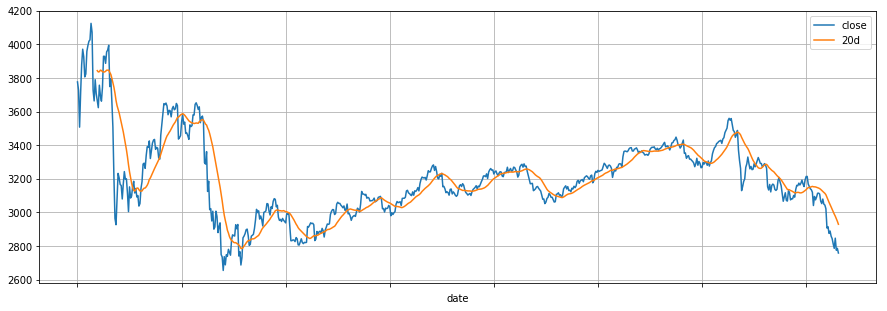

In [7]:
sh = shidx.sort_index()
#print sh['close']
#使用TALIB计算20日均线
ma = ta.MA(sh['close'].values,20)
sh.loc[:,'20d'] = ma

sh[['close','20d']].plot(figsize = (15,5),grid = True)

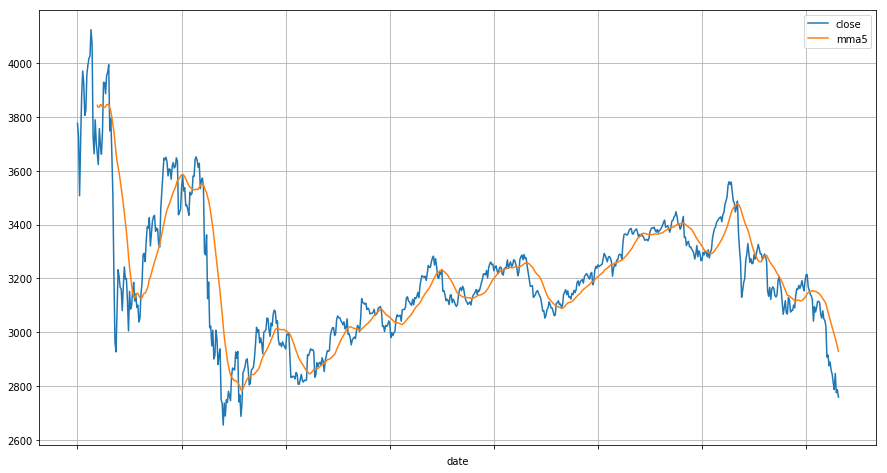

In [8]:
ma1 = pd.DataFrame(ma)
ma1.index = sh.index
#print ma1
sh['mma5'] = ma1

sh[['close','mma5']].plot(figsize = (15,8),grid = True)

# 布林通道

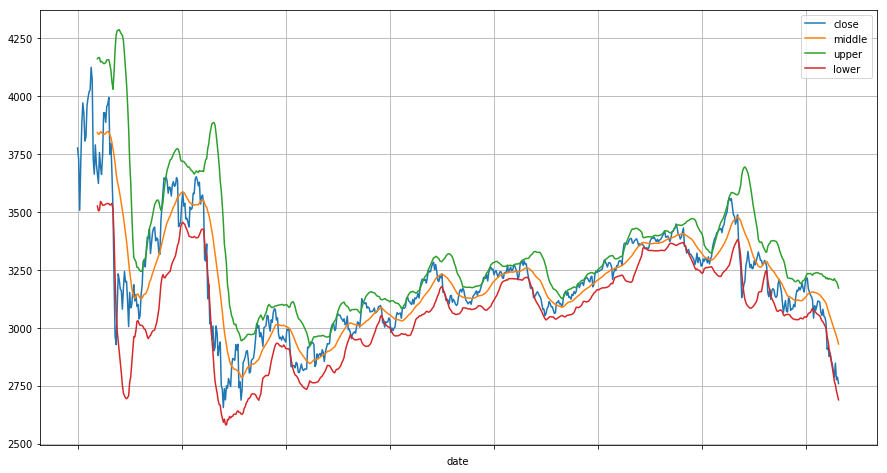

In [6]:
import numpy as np

sh = shidx.sort_index()
close = sh[['close','volume']]

#函数用的price必须为narray
upper,middle,lower = ta.BBANDS( sh['close'].values,
                                timeperiod=20,
                                nbdevup = 2,
                                nbdevdn = 2,
                                matype = 0
                               )

close.loc[:,'upper'] = upper
close.loc[:,'middle']=middle
close.loc[:,'lower']=lower

close[['close','middle','upper','lower']].plot(figsize=(15,8),grid = True)


# K线图 CandleStick

In [9]:
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
from matplotlib.pylab import date2num
import talib as ta
import datetime
import numpy as np

In [14]:
hs300 = ts.get_hist_data('hs300')
hist_data = hs300[['open','high','low','close','volume','ma5','ma10']]

In [15]:
# 对tushare获取到的数据转换成candlestick_ohlc()方法可读取的格式
data_list = []
data_volume=[]
data_ma=[]
for dates,row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    open,high,low,close = row[:4]
    volume = row[4]
    ma1 = row[4:]
    datas = (t,open,high,low,close)
    data_v = (t,volume)
    data_list.append(datas)
    data_volume.append(data_v)
    volume = np.array(data_volume)
    ma = np.array(ma1)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

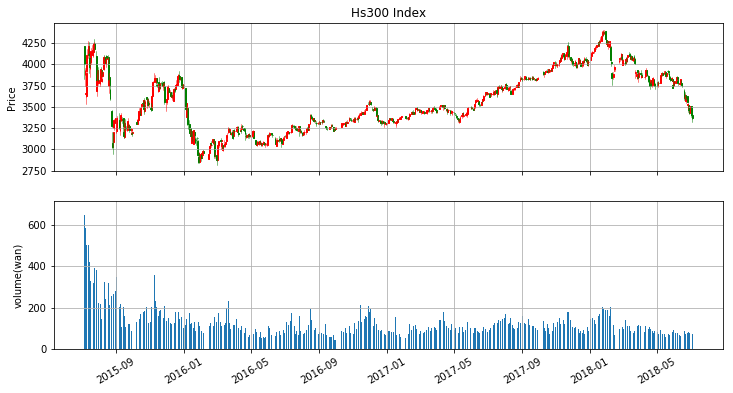

In [16]:
## 创建子图
##设置子图1
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(12,6))
mpf.candlestick_ohlc(ax1,data_list,width=1.5,colorup='r',colordown='green')
ax1.set_title('Hs300 Index')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.xaxis_date()

#设置子图2
plt.bar(volume[:,0],volume[:,1]/10000)
ax2.set_ylabel('volume(wan)')
ax2.grid(True)
ax2.autoscale_view()

plt.setp(plt.gca().get_xticklabels(),rotation = 30)